# <font color='red'> Questions for Andres</font>:
- in Figure 1 source data, are the animal identities matched across sheets in the excel file? (In other words, is the animal in Row 1 (...etc) the same across sheets). I want to have students look at correlations between behaviors across animals, but this only works if the spreadsheet is organized by rows as paired data (I also see that the number of animals of each species&sex tested for licking behavior is different than for the other 3 behaviors. Was this a different cohort? However, in Figure 1 the number of animals for licking is listed as the same for the other behaviors.) <br> In Figure 2, the number of subjects in the licking sheet in excel are also different from all other 3 behaviors and from the 'n' listed in Figure 2.
> The correlations from source data in Fig 1 & 2 come out much different (weaker or even negative) than correlations calculated from source data from Fig 3 for the parental generation, which makes me think the source data for Fig1&2 are not organized in a way that maintains individual identity across sheets. Do you have individual identity for the source data for Figs 1&2? 

# **The genetic basis of parental care evolution in monogamous mice.** 
### Andres Bendesky, Young-Mi Kwon,  Jean-Marc Lassance,  Caitlin L. Lewarch, Shenqin Yao, Brant K. Peterson, Meng Xiao He,  Catherine Dulac,  & Hopi E. Hoekstra
> *Nature* **2017**

> **ABSTRACT:** Parental care is essential for the survival of mammals, yet the mechanisms underlying its evolution remain largely unknown. Here we show that two sister species of mice, Peromyscus polionotus and Peromyscus maniculatus, have large and heritable differences in parental behaviour. Using quantitative genetics, we identify 12 genomic regions that affect parental care, 8 of which have sex-specific effects, suggesting that parental care can evolve independently in males and females. Furthermore, some regions affect parental care broadly, whereas others affect specific behaviours, such as nest building. Of the genes linked to differences in nest-building behaviour, vasopressin is differentially expressed in the hypothalamus of the two species, with increased levels associated with less nest building. Using pharmacology in Peromyscus and chemogenetics in Mus, we show that vasopressin inhibits nest building but not other parental behaviours. Together, our results indicate that variation in an ancient neuropeptide contributes to interspecific differences in parental care.

In [6]:
# @title Monogomous and Permiscuous voles
%%html
<div align='center'>
  <img src='https://drive.google.com/uc?export=view&id=15MZd0zThC4KbFyPUau8CoHZNtb6XHPTS' style="width: 85vw"></div>



In preparation for this classroom session you read the paper "*The genetic basis of parental care evolution in monogamous mice*" as well as the "News and Views" commentary "*How to build a better dad*" written by Steven Phelps.<br>

**Today** you will work directly with data from this paper.
<br>
<br>

First, **execute** the cell below in order to: 
>1) prepare your notebook with the necessary packages to do the work <br>
>2) mount your personal google drive so that you can access your files and save your work at the end of class (and periodically during class!)

In [104]:
#@title __execute__ this cell to prepare your notebook environment with the necessary packages 

# and mount your google drive

import numpy as np
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display

plt.rcParams.update({'font.size': 18})

# from google.colab import drive
# drive.mount('/content/gdrive')

def create_figure():
  hfig = plt.figure()
  ax = hfig.add_axes([0.1,0.1,0.8,0.8])
  return ax

### Before working with the data, let's reflect on some of the important aspects of the experimental design.
> Diversity of parental care behavior is widespread in the animal kingdom. What was special about these two vole species in particular that enabled the researchers to interrogate the genetic basis of parental care behaviors? <br> __Type your answer__ in the cell below and hit the **Play icon** or ```Shift + Enter``` after you are finished:

### Below are 4 videos that demonstrate the parental behavior of mothers and fathers of each vole species. Each video is long (~20min), but you can flip through different points in the video to get a general sense of differences. You can revisit these videos later on your own if you like. 


In [5]:
#@title Parental Behavior of a Peromyscus polionotus father:
%%html
<div align="center">
<video width=600 controls>
      <source src="https://static-content.springer.com/esm/art%3A10.1038%2Fnature22074/MediaObjects/41586_2017_BFnature22074_MOESM129_ESM.mp4" type="video/mp4">
</video>
</div>

In [4]:
#@title Parental Behavior of a Peromyscus maniculatus father:
%%html
<div align="center">
<video width=600 controls>
      <source src="https://static-content.springer.com/esm/art%3A10.1038%2Fnature22074/MediaObjects/41586_2017_BFnature22074_MOESM130_ESM.mp4" type="video/mp4">
</video>
</div>

In [3]:
#@title Parental Behavior of a Peromyscus polionotus mother:
%%html
<div align="center">
<video width=600 controls>
      <source src="https://static-content.springer.com/esm/art%3A10.1038%2Fnature22074/MediaObjects/41586_2017_BFnature22074_MOESM131_ESM.mp4" type="video/mp4">
</video>
</div>

In [6]:
#@title Parental Behavior of a Peromyscus maniculatus mother:
%%html
<div align="center">
<video width=600 controls>
      <source src="https://static-content.springer.com/esm/art%3A10.1038%2Fnature22074/MediaObjects/41586_2017_BFnature22074_MOESM132_ESM.mp4" type="video/mp4">
</video>
</div>

### Now, let's work with the data.
#### We will start with <font color=green> Figure 1</font>.
**Execute** the cell below in order to import the raw data provided with the online version of the research article <br> (located at https://www.nature.com/articles/nature22074#Sec28) 

In [137]:
#@title Load the data and sort it into dataframes for each Panel of Figure 1

# URL of data to download
data_url = 'https://static-content.springer.com/esm/art%3A10.1038%2Fnature22074/MediaObjects/41586_2017_BFnature22074_MOESM110_ESM.xlsx'

# Get the data and save it locally as "data.xls"
data, headers = urllib.request.urlretrieve(data_url, './data.xls')

xls = pd.ExcelFile(data)
df_NestQuality = pd.read_excel(xls, sheet_name = 'panel C', skiprows = 1)
df_Licking = pd.read_excel(xls, sheet_name = 'panel D', skiprows = 1)
df_Huddling = pd.read_excel(xls, sheet_name = 'panel E', skiprows = 1)
df_Retrieving = pd.read_excel(xls, sheet_name = 'panel F', skiprows = 1)

### You now have a dataframe (df) for the data underlying each panel of Figure 1 
#### dataframe names:
- df_Licking
- df_NestQuality
- df_Huddling
- df_Retrieving
#### You can display the contents of each imported dataframe to look at the data. 
> __Type a dataframe name__ in the cell below hit the **Play icon** or ```Shift + Enter```  to print the contents of dataframe to the notebook page.

In [138]:
df_Licking

,P. maniculatus mothers,P. polionotus mothers,P. maniculatus fathers,P. polionotus fathers
0,0.400000,0.783333,0.150000,1.633333
1,0.516667,1.583333,2.000000,2.266667
2,0.300000,2.733333,0.508333,3.150000
3,0.616667,1.033333,0.725000,0.808333
4,0.700000,1.566667,0.016667,2.075000
5,0.816667,1.066667,0.283333,2.108333
6,0.300000,0.383333,0.050000,2.083333
7,0.300000,1.383333,0.066667,0.808333
8,0.250000,2.083333,0.816667,1.283333
9,0.516667,1.500000,0.033333,1.600000


### To understand the data it is important to know the number of individuals observed in each behavior. We can use the ```len( )``` function to return the length of objects in Python.
> For example, the command ```len(df_Licking)``` gives the length (number of rows) <br> of the dataframe for Panel C. <br>
> Try this by __executing__ the cell below.

In [ ]:
len(df_Licking)

### Does this reflect the number of animals of each species&sex tested? 
> __hint__ display the dataframe for Panel C and look at the contents of each column. What are the NaN values? <br>
__Type__ your answer in the cell below and hit the **Play icon** or ```Shift + Enter``` after you are finished:

### To know the number of animals of each species&sex used to create Figure 1 we need to be more specific about the dataframe. 
- First, we need to look at only one column at a time by referring to the column name in the following format: <br> ```df_Licking['P. maniculatus mothers']``` <br> (*spaces and lower/upper case matters!*)
- Next, we need to eliminate the NaN values from the selected column using the ```.dropna()``` method
> Examine the result of these commands by __executing__ the cell below:

In [141]:
df_Licking['P. maniculatus mothers'].dropna()

0     0.400000
1     0.516667
2     0.300000
3     0.616667
4     0.700000
5     0.816667
6     0.300000
7     0.300000
8     0.250000
9     0.516667
10    0.016667
11    0.250000
12    0.233333
13    0.183333
14    0.316667
15    0.250000
16    0.516667
17    0.216667
18    0.333333
Name: P. maniculatus mothers, dtype: float64

### In the cell below, use what you have just learned to write a command to find the number of P. maniculatus mothers used to quantify licking behavior and assign it to the variable '*N*'. <br> 
#### Hit the **Play icon** or ```Shift + Enter``` when finished to execute the command you have written.

In [ ]:
#@title Now, __execute__ this cell to display your answer in a printed statement.
print('You have calculated that N = ' str(N) + ' P. maniculatus mothers were used to quantify licking behavior.')

### Great! Now that you understand better how to manipulate and access the data for Figure 1, let's ask some questions that were not explicitly shown in the paper.

#### Do you think that some of these behaviors are correlated with each other within an individual? In other words, are mothers that build quality nests are also good huddlers? To ask this question we can visualize and calculate *correlations* between each behavior across individuals.
> Why can we not look at the correlation between Licking behavior and any of the other behaviors examined in Figure 1? __Hint__, look at the contents of each dataframe again and pay attention to the length of each column across dataframes.

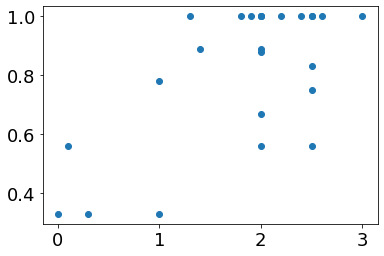

In [142]:
plt.scatter(df_NestQuality['P. polionotus mothers'].dropna(),
            df_Retrieving['P. polionotus mothers'].dropna())

In [147]:
np.corrcoef(df_NestQuality['P. polionotus mothers'].dropna(),df_Retrieving['P. polionotus mothers'].dropna())

array([[1.        , 0.65834263],
       [0.65834263, 1.        ]])

In [148]:
np.corrcoef(df_NestQuality['P. polionotus mothers'].dropna(),df_Huddling['P. polionotus mothers'].dropna())

array([[ 1.        , -0.01815306],
       [-0.01815306,  1.        ]])

In [150]:
np.corrcoef(df_Huddling['P. polionotus mothers'].dropna(),df_Retrieving['P. polionotus mothers'].dropna())

array([[ 1.        , -0.04623775],
       [-0.04623775,  1.        ]])

<br>

### <font color=green> Figure 2 </font>

### Figure 2 contains data that can be pooled with Figure 1 to increase the power in our analysis of correlation between behaviors.

In [9]:
#@title __execute__ this cell to import and format data for Figure 2


In [ ]:
#@title __execute__ this cell to combine data from the non-cross fostered individuals in Figure 2 to the individuals in Figure 1


<br>

### <font color=green> Figure 3 </font>

### The authors use Figure 3 to make the following statement: <br>
> "*The distribution of each component of parental care among the F2 mice encompassed the distributions of both species (Fig. 3b–e). On the basis of the largely unimodal distributions of parental behaviours among the F2 hybrids, which resembled P. maniculatus more closely than P. polionotus, the more extensive parental care of P. polionotus probably involves more than one genetic locus.*" <br>
#### We can plot the data from Figure 3 in different ways that may help us visualize this better. Here, we will make a histogram and a smoothed histogram for each group and overlay them on the same plot.

In [26]:
#@title __execute__ this cell to import and format data for Figure 3

# URL of data to download
data_url = 'https://static-content.springer.com/esm/art%3A10.1038%2Fnature22074/MediaObjects/41586_2017_BFnature22074_MOESM114_ESM.xlsx'

# Get the data and save it locally as "data.xls"
data, headers = urllib.request.urlretrieve(data_url, './data.xls')

xls = pd.ExcelFile(data)

df = pd.read_excel(xls, sheet_name = 'panels B-E', header = None, skiprows = 1,names=['ID', 'Parent', 'Species','Retrieval','Huddling','Licking','NestQuality'])

#### Take a moment to look at the dataframe for Figure 3. Notice how we have organized it a bit differently than the dataframes from the other figures. Here, everything is contained in a single dataframe named '**df**'. Use the cell below to view the contents of this dataframe.

In [27]:
df

,ID,Parent,Species,Retrieval,Huddling,Licking,NestQuality
0,1355,mother,P. maniculatus,0.78,186.3,NaN,0.73
1,104,mother,P. maniculatus,0.67,598.7,NaN,0.33
2,114,mother,P. maniculatus,0.44,462.0,NaN,0.00
3,1366,mother,P. maniculatus,1.00,863.7,NaN,0.00
4,1356,mother,P. maniculatus,1.00,898.7,NaN,0.80
...,...,...,...,...,...,...,...
937,4827,father,F2,0.00,0.0,0.0,0.13
938,4184,father,F2,0.00,13.7,8.7,0.03
939,4245,father,F2,0.00,0.7,0.0,0.03
940,4917,father,F2,0.00,0.0,0.0,0.00


#### Each row corresponds to a different individual. Each column contains information about each individual. We can find individuals fulfilling certain criteria by asking which rows are equal to (```==```) a certain criteria. For example, to find which individuals are mothers we would type ```df['Parent']=='mother```. In words, we are stating "**the parent is a mother**." In return, we will get an assessment of whether this statement was true or false for each row. Try this in the cell below (note capitalization in column headers):

In [25]:
df['Parent'] == 'mother'

0       True
1       True
2       True
3       True
4       True
       ...  
937    False
938    False
939    False
940    False
941    False
Name: Sex, Length: 942, dtype: bool

#### For each row in which the statement "The parent is female" is true, there is a ' ```True``` ' and vice versa for each row in which the statement is false. The result is called a *boolean* array and is very useful for sorting through the dataframe to isolate information we are interested in.  <br>
#### **execute** the following cell to assign the result above to the variable ' ```bool``` ' and use that variable to pull out data for all mothers and assign it to a new dataframe called '**df_mothers**'.

In [29]:
bool = df['Parent'] == 'mother'
df_mothers = df[bool]

#### Great! If you compared the size (```len()```) of *df_mothers* to *df*, you would see that *df_mothers* contains data from a smaller number of animals (because it leaves out all data for fathers).<br>
> ##### If you would like, you can add a new code cell below and look at this for yourself (refer to earlier in the notebook for examples of how you examined the length of a dataframe before). <br>
#### Now, let's look at a histogram of the data we just extracted. <br>
#### First, Pick a behavior to plot (Retrieval, Huddling, Licking, or NestQuality).
 - Assign your behavior to the variable ' ```behavior``` ' (make sure to include quotation marks). 
 > ```behavior = ```
 - To look at data for only that behavior, query the dataframe using the following command (because you assigned your behavior to the variable ```behavior```, the plot will display the data only for your behavior.): <br>
> ```sns.distplot(df_mothers[behavior])``` <br>
>> (The function ```sns.distplot()``` creates a histogram plot for you. You can read more about this function here: https://seaborn.pydata.org/generated/seaborn.distplot.html. <br> There are lots of other ways to create a histogram. For example, we will also use a similar function ```sns.kdeplot()``` below that you can read more about here: https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot)

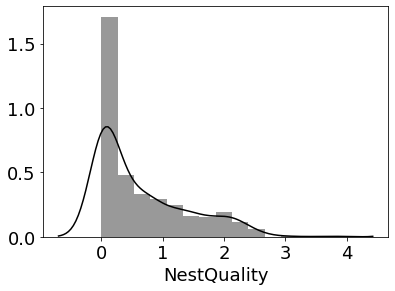

In [73]:
behavior = 'NestQuality'
ax = create_figure()
sns.distplot(df_mothers[behavior], ax = ax, color = 'black')

#### In addition to the 'binned' histogram, we have plotted a 'smoothed' histogram (also known as a kernel density estimate - KDE). Discuss which you think is a more accurate way to look at the data. What is the histogram telling you about the data?

#### Ok, so what is the data that we want to visualize and compare? <br> First, we want a histogram of this behavior data for all mothers in the Parental generation combinted (both species P. maniculatus and P. polionotus). <br> Then we want to overlay this with a histograms of this behavior data for each of the two species in the Parental generation individually. <br>
##### Note, we will visualize using KDE plots instead of histogram plots.
> (1) Complete the commands in the cell below to create a boolean array for each species and assign these booleans to the variables: <br>
 ' ```bool_polionotus``` ' and ' ```bool_maniculatus``` '. <br>

 >> Take care to use the *df_mothers* dataframe we have created rather than the original *df* dataframe <br>

> (2) Hit the **Play icon** or ```Shift + Enter``` when finished to execute the command you have written.

In [75]:
bool_polionotus = df_mothers['Species'] == 'P. polionotus'
bool_maniculatus = df_mothers['Species'] == 'P. maniculatus'

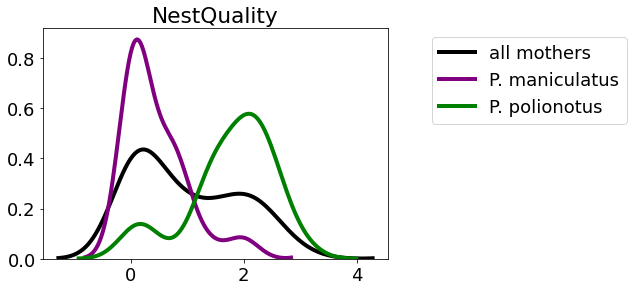

In [77]:
#@title __execute__ this cell to use the 'mothers' dataframe, behavior-of-interest variable, and boolean variables for each species that you created and draw overlaid KDE plots
ax = create_figure()
sns.kdeplot(df_mothers[bool_maniculatus|bool_polionotus][behavior], ax = ax, legend=False, color = 'black', lw=4)

sns.kdeplot(df_mothers[bool_maniculatus][behavior], ax = ax, legend=False, color = 'purple', lw=4)
sns.kdeplot(df_mothers[bool_polionotus][behavior], ax = ax, legend=False, color = 'green', lw=4)

from matplotlib.lines import Line2D
custom_lines = [matplotlib.lines.Line2D([0], [0], color='black', lw=4),
                matplotlib.lines.Line2D([0], [0], color='purple', lw=4),
                matplotlib.lines.Line2D([0], [0], color='green', lw=4)]

ax.set_title(behavior)
ax.legend(custom_lines, ['all mothers', 'P. maniculatus', 'P. polionotus'],
          bbox_to_anchor=[1.1,1]);

#### Another way to visualize the same data and the relationships between each group is to use a **cumulative distribution** plot. We can use the same function, but add ``` cumulative = True ``` to the function input. <br>

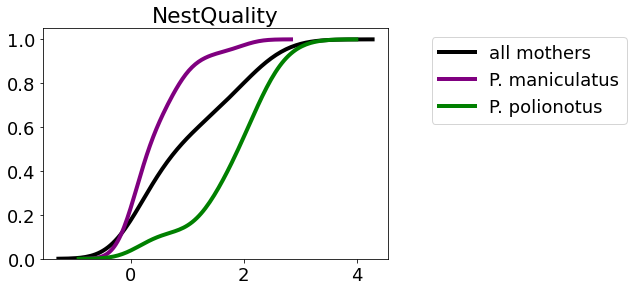

In [78]:
#@title **execute** this cell to create a *cumulative distribution* plot of the same data.

ax = create_figure()
sns.kdeplot(df_mothers[bool_maniculatus|bool_polionotus][behavior], ax = ax, cumulative = True, legend=False, color = 'black', lw=4)

sns.kdeplot(df_mothers[bool_maniculatus][behavior], ax = ax, cumulative = True,legend=False, color = 'purple', lw=4)
sns.kdeplot(df_mothers[bool_polionotus][behavior], ax = ax, cumulative = True, legend=False, color = 'green', lw=4)

from matplotlib.lines import Line2D
custom_lines = [matplotlib.lines.Line2D([0], [0], color='black', lw=4),
                matplotlib.lines.Line2D([0], [0], color='purple', lw=4),
                matplotlib.lines.Line2D([0], [0], color='green', lw=4)]

ax.set_title(behavior)
ax.legend(custom_lines, ['all mothers', 'P. maniculatus', 'P. polionotus'],
          bbox_to_anchor=[1.1,1]);

#### **Discuss** the differences and similarities between each plot. If you were to summarize what each plot is showing you, that summary would be different for each plot. <br> 
#### Give it a shot! In the cell below, __type a brief description__ of what the plot shows and then hit the **Play icon** or ```Shift + Enter``` after you are finished. <br>
>  We will also discuss as a class. 

#### Now that you know how to look at data from multiple groups of animals (and/or conditions) on the same plot, let's look at the *F2* population. In this dataframe, the second generation animals are identified as the *F2* 'Species'. We already know how to isolate data from the dataframe based on species by creating a *boolean*. Finish the command in the cell below to create a boolean that will give you the mothers that are of the *F2* 'species'.

In [79]:
bool_F2 = df_mothers['Species']=='F2'

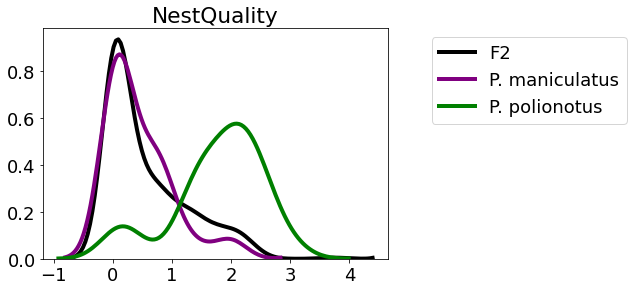

In [80]:
#@title __execute__ this cell to draw overlaid KDE plots of the F2, polionotus, and maniculatus species for your behavior
ax = create_figure()
sns.kdeplot(df_mothers[bool_F2][behavior], ax = ax, legend=False, color = 'black', lw=4)

sns.kdeplot(df_mothers[bool_maniculatus][behavior], ax = ax, legend=False, color = 'purple', lw=4)
sns.kdeplot(df_mothers[bool_polionotus][behavior], ax = ax, legend=False, color = 'green', lw=4)

from matplotlib.lines import Line2D
custom_lines = [matplotlib.lines.Line2D([0], [0], color='black', lw=4),
                matplotlib.lines.Line2D([0], [0], color='purple', lw=4),
                matplotlib.lines.Line2D([0], [0], color='green', lw=4)]

ax.set_title(behavior)
ax.legend(custom_lines, ['F2', 'P. maniculatus', 'P. polionotus'],
          bbox_to_anchor=[1.1,1]);

#### Next, the authors tested for correlations among behaviours in the F2 progeny. <br> From this analysis they concluded that: <br>
> " *Some genetic loci affect multiple parental  behaviours, whereas nest building is more genetically independent from the other behaviours measured.* "
#### __Discuss__ this conclusion and how their data supports their statement. What would be different about the resutls if the alternative (that all behaviors are genetically independent from each other) were true?
#### When working with the data from Figure 1, you practiced calculating the correlation between different behaviors across individuals. In Figure 4, the authors published the correlations between behaviors among the F2 population. Let's use the data in the dataframe (*df*) that you loaded from Figure 3 to get the results of this analysis for both the original parental animals and the F2 animals. Then, you can compare the behavior correlations across these two groups and with the author's results for the F2 population. (Note that in Figure 4, they also analyzed two other behaviors (Handling and Approach) that we do not have data for in Figure 3.)


In [84]:
df_mothers[bool_maniculatus | bool_polionotus].corr()

,Retrieval,Huddling,Licking,NestQuality
Retrieval,1.000000,0.379837,0.297054,0.372019
Huddling,0.379837,1.000000,0.524578,0.424792
Licking,0.297054,0.524578,1.000000,0.774571
NestQuality,0.372019,0.424792,0.774571,1.000000


In [85]:
df_mothers[bool_F2].corr()

,Retrieval,Huddling,Licking,NestQuality
Retrieval,1.000000,0.615283,0.400360,0.315066
Huddling,0.615283,1.000000,0.549206,0.310970
Licking,0.400360,0.549206,1.000000,0.216846
NestQuality,0.315066,0.310970,0.216846,1.000000


In [116]:
#@title Load Figure 4 data and display the raw correlation coefficient values to compare to your own results from Figure 3

# URL of data to download
data_url = 'https://static-content.springer.com/esm/art%3A10.1038%2Fnature22074/MediaObjects/41586_2017_BFnature22074_MOESM116_ESM.xlsx'

# Get the data and save it locally as "data.xls"
data, headers = urllib.request.urlretrieve(data_url, './data.xls')

xls = pd.ExcelFile(data)

df_Fig4_fathers = pd.read_excel(xls,nrows=6,skiprows=3,header=None,names=['Nest quality', 'Time licking pup', 'Time huddling pup','Fraction of pups retrieved','Promptness to handle pup','Promptness to approach pup'])
df_Fig4_mothers = pd.read_excel(xls,nrows=6,skiprows=12,header=None,names=['Nest quality', 'Time licking pup', 'Time huddling pup','Fraction of pups retrieved','Promptness to handle pup','Promptness to approach pup'])
from termcolor import colored
print('')
print("\033[31m \033[1m" + 'Figure 4 -- F2 Mothers:' + "\033[0m")
display(df_Fig4_mothers)
print('')
print('')
print('')
print("\033[31m \033[1m" + 'Figure 4 -- F2 Fathers:' + "\033[0m")
display(df_Fig4_fathers)


 Figure 4 -- F2 Mothers:


,Nest quality,Time licking pup,Time huddling pup,Fraction of pups retrieved,Promptness to handle pup,Promptness to approach pup
Nest quality,1.000000,0.312862,0.280241,0.304506,0.278067,0.217494
Time licking pup,0.312862,1.000000,0.658856,0.450387,0.354628,0.234033
Time huddling pup,0.280241,0.658856,1.000000,0.514403,0.435383,0.319959
Fraction of pups retrieved,0.304506,0.450387,0.514403,1.000000,0.458454,0.350279
Promptness to handle pup,0.278067,0.354628,0.435383,0.458454,1.000000,0.641958
Promptness to approach pup,0.217494,0.234033,0.319959,0.350279,0.641958,1.000000





 Figure 4 -- F2 Fathers:


,Nest quality,Time licking pup,Time huddling pup,Fraction of pups retrieved,Promptness to handle pup,Promptness to approach pup
Nest quality,1.000000,0.397057,0.432564,0.330017,0.336851,0.238646
Time licking pup,0.397057,1.000000,0.879769,0.520665,0.721979,0.273197
Time huddling pup,0.432564,0.879769,1.000000,0.604466,0.717198,0.267817
Fraction of pups retrieved,0.330017,0.520665,0.604466,1.000000,0.464186,0.200326
Promptness to handle pup,0.336851,0.721979,0.717198,0.464186,1.000000,0.443382
Promptness to approach pup,0.238646,0.273197,0.267817,0.200326,0.443382,1.000000


#### Figure 4 reports the correlation coefficient table for fathers as well as mothers. The authors note that there is a stronger effect in the fathers. <br> Using what you have learned today, __add cells below__ and __write code__ that will display the correlation coefficient table from the Figure 3 dataframe (*df*) for Parental fathers and for F2 fathers (like you had done above for the mothers). 
> __hint__: start by creating a df_fathers dataframe (like how you created the df_mothers dataframe)
#### Don't forget to hit the **Play icon** or ```Shift + Enter``` to execute your commands and/or display your result for each cell. 

In [ ]:
#@title  Answer
bool = df['Parent'] == 'father'
df_fathers = df[bool]

bool_polionotus = df_fathers['Species'] == 'P. polionotus'
bool_maniculatus = df_fathers['Species'] == 'P. maniculatus'
bool_F2 = df_fathers['Species']=='F2'

print('')
print('Parental')
display(df_fathers[bool_maniculatus | bool_polionotus].corr())
print('')
print('')
print('F2')
display(df_fathers[bool_F2].corr())

#### Do you notice anything from comparing all of these results that the authors did not mention? <br> Let's discuss.


[https://alleninstitute.org/media/filer_public/a3/bc/a3bcba2a-7a01-427b-adad-64cf3a8b12ed/alleninstitute_buildingblocksbrain_2020b.pdf] 

The authors pinpoint a specific 
Look up the function of this gene in the NIH gene list (https://www.ncbi.nlm.nih.gov/gene/). Click on the blue tags to see
function. Scroll down to 'orthologs' to compare to mouse.

To examine how the expression of this gene and its receptor varies across brain regions in humans...
1. Access the Allen Human Brain Atlas microarray data: human.brain-map.org.
2. Enter the gene name into the search box. The data is organized by gene, probe (the chemical
the scientists used to measure the gene expression), and brain donor.
3. Find a gene/probe combination for your gene – there may be several variants for the gene, so
make sure you have the right one (consistent with the gene name in the research paper).
4. When you click on the gene name, an info box will pop up above the heat map. Click on either
the gene symbol or gene name to go to the detailed data page.
5. The gene expression data comes from six donated human brains. For at least three of the six
brains, pick a brain region that has high expression -- see if this helps you find the region emphasized by the authors in the paper.
6. Each region will have a Z score for that gene’s expression. Record the Z scores for at least three brains, to two decimal places. 

7. Go back to the gene/probe combinations list. Notice the ones that have an 'R'? This stands for 'receptor' -- a receptor for the protein produced by the gene.
8. Record the expression level of the receptor for your gene in the same brain region. Compare with the expression of the gene for the protein.

9. Where are expression levels highest for the receptor of the protein?

Z scores compare gene expression of one gene across brain structures, so you should discuss expression in relative terms and not compare values across genes (e.g. Gene 1’s expression is far below its average, Gene 2’s expression is around its average,
etc.).

## Resources
For additional Jupyter Notebook information and practice, see [this tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) from DataQuest. 

## About this Notebook
This notebook was created by [Krista Perks](https://github.com/neurologic) for the Animal Behavior class at Wesleyan University.